<a href="https://colab.research.google.com/github/priyanu17/classification_analysis/blob/master/Scoring_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Another required library
import pandas.util.testing as tm

In [3]:
## Import dataset into notebook

data = pd.read_csv("Scoring.csv")

In [4]:
# Exploring our dataset

In [5]:
# Head on dataset
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
data.columns.size

37

In [8]:
# Our dataset has 37 columns in total
# Target Variable is : "Converted"

In [9]:
# PROBLEM STATEMENT:

# To analyze and find high risk variables
# Find variables that throughly affect data and what relationship exists between them
# To find high dependencies in our data 


In [10]:
# Info on dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
# Shape of data:
data.shape

(9240, 37)

In [12]:
# Thus, our data consists on 9240 rows and 37 columns

In [13]:
# Describe on data:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [14]:
# Statistical parameters for numeric columns can be viewed above

In [15]:
# Dtypes on data:
data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [16]:
# Checking for duplicate entries in our dataset:
data.duplicated(keep = "first").value_counts()

False    9240
dtype: int64

In [17]:
# No duplicate rows are present in our dataset
# Unique Identifier is present in our data : "Prospect ID"
data["Prospect ID"].unique().size

9240

In [18]:
# "Prospect ID" acts as unique identifier as it has as many number of unique values 
# as there are rows in the dataset

In [19]:
# Function to check for constant feature columns in our data.
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

In [20]:
# finding constant feature columns as they do not affect the TARGET variable
print("Constant Feature Columns are :\n")
find_constant_features(data)

Constant Feature Columns are :



['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [21]:
data["Magazine"].unique()

array(['No'], dtype=object)

In [22]:
data["Receive More Updates About Our Courses"].unique()

array(['No'], dtype=object)

In [23]:
data["Update me on Supply Chain Content"].unique()

array(['No'], dtype=object)

In [24]:
data["Get updates on DM Content"].unique()

array(['No'], dtype=object)

In [25]:
data["I agree to pay the amount through cheque"].unique()

array(['No'], dtype=object)

In [26]:
# All constant feature columns can be dropped :
# They have same value for all rows and hence, do not affect the target variable

data = data.drop(columns = ["Magazine", "Receive More Updates About Our Courses", 
                            "Update me on Supply Chain Content", "Get updates on DM Content",
                            "I agree to pay the amount through cheque"])

In [27]:
data.columns.size

32

In [28]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [29]:
# Rename column names in the dataset

data = data.rename(columns = {
    "How did you hear about X Education" : "Heard From Source" ,
    "What is your current occupation" : "Current Occupation",
    "What matters most to you in choosing a course" : "Important Career Factor",
    "A free copy of Mastering The Interview" : "Free Copy"
})

In [30]:
# Dealing with null values in our dataset

In [31]:
# Finding Null value counts in the dataset
data.isna().sum()

Prospect ID                       0
Lead Number                       0
Lead Origin                       0
Lead Source                      36
Do Not Email                      0
Do Not Call                       0
Converted                         0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Last Activity                   103
Country                        2461
Specialization                 1438
Heard From Source              2207
Current Occupation             2690
Important Career Factor        2709
Search                            0
Newspaper Article                 0
X Education Forums                0
Newspaper                         0
Digital Advertisement             0
Through Recommendations           0
Tags                           3353
Lead Quality                   4767
Lead Profile                   2709
City                           1420
Asymmetrique Activity Index    4218
Asymmetrique Profile Index  

In [32]:
# Finding Null percentage values in the dataset 

((data.isna().sum()/len(data))*100).round(2)


Prospect ID                     0.00
Lead Number                     0.00
Lead Origin                     0.00
Lead Source                     0.39
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
TotalVisits                     1.48
Total Time Spent on Website     0.00
Page Views Per Visit            1.48
Last Activity                   1.11
Country                        26.63
Specialization                 15.56
Heard From Source              23.89
Current Occupation             29.11
Important Career Factor        29.32
Search                          0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
Tags                           36.29
Lead Quality                   51.59
Lead Profile                   29.32
City                           15.37
Asymmetrique Activity Index    45.65
A

In [33]:
# Dropping columns with > 45% empty values

In [34]:
data = data.drop(columns = ["Asymmetrique Activity Index", "Asymmetrique Profile Index",
                            "Asymmetrique Activity Score", "Asymmetrique Profile Score",
                            "Lead Quality"])

In [35]:
data.columns.size

27

In [36]:
# Our dataset now has 27 columns :

# 26 Independent Variables
# 1 Target/Dependent VAriable

In [37]:
((data.isna().sum()/len(data))*100).round(2)


Prospect ID                     0.00
Lead Number                     0.00
Lead Origin                     0.00
Lead Source                     0.39
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
TotalVisits                     1.48
Total Time Spent on Website     0.00
Page Views Per Visit            1.48
Last Activity                   1.11
Country                        26.63
Specialization                 15.56
Heard From Source              23.89
Current Occupation             29.11
Important Career Factor        29.32
Search                          0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
Tags                           36.29
Lead Profile                   29.32
City                           15.37
Free Copy                       0.00
Last Notable Activity           0.00
d

In [38]:
# Dropping rows for which columns have very less percentage of null values ( < 2%)
data = data.dropna(axis = 0, subset=["Lead Source", "TotalVisits",
                                     "Page Views Per Visit", "Last Activity"])

In [39]:
((data.isna().sum()/len(data))*100).round(2)


Prospect ID                     0.00
Lead Number                     0.00
Lead Origin                     0.00
Lead Source                     0.00
Do Not Email                    0.00
Do Not Call                     0.00
Converted                       0.00
TotalVisits                     0.00
Total Time Spent on Website     0.00
Page Views Per Visit            0.00
Last Activity                   0.00
Country                        25.30
Specialization                 15.77
Heard From Source              24.25
Current Occupation             29.57
Important Career Factor        29.78
Search                          0.00
Newspaper Article               0.00
X Education Forums              0.00
Newspaper                       0.00
Digital Advertisement           0.00
Through Recommendations         0.00
Tags                           36.67
Lead Profile                   29.78
City                           15.64
Free Copy                       0.00
Last Notable Activity           0.00
d

In [40]:
# Dealing with missing data which is still present in our data:

In [41]:
# Extract columns with null values in them
null_value_columns = data.columns[data.isna().any()].tolist()

In [42]:
null_value_columns

['Country',
 'Specialization',
 'Heard From Source',
 'Current Occupation',
 'Important Career Factor',
 'Tags',
 'Lead Profile',
 'City']

In [43]:
data["Country"].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Canada                     4
Kuwait                     4
Sweden                     3
Italy                      2
China                      2
Bangladesh                 2
Netherlands                2
Philippines                2
Uganda                     2
Asia/Pacific Region        2
Belgium                    2
Ghana                      2
Denmark                    1
Indonesia                  1
Liberia                    1
Russia                     1
Malaysia                   1
Kenya                      1
Vietnam       

In [44]:
# Create a column "Unknown" for missing values in "Country" column

In [45]:
# Unknown already exists for "Country" column

In [46]:
data["Specialization"].value_counts()

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [47]:
# Create a column "Unknown" for missing values in "Specialization" column

In [48]:
# "Select" will go to "Unknown" column

In [49]:
data["Heard From Source"].value_counts()

Select                   4886
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: Heard From Source, dtype: int64

In [50]:
# Create a column "Unknown" for missing values in "Heard From Source" column

In [51]:
# "Select" will go to "Unknown" column

In [52]:
data["Current Occupation"].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: Current Occupation, dtype: int64

In [53]:
# Create a column "Unknown" for missing values in "Heard From Source" column

In [54]:
data["Important Career Factor"].value_counts()

Better Career Prospects      6370
Other                           1
Flexibility & Convenience       1
Name: Important Career Factor, dtype: int64

In [55]:
# Create a column "Unknown" for missing values in "Important Career Factor" column

In [56]:
data["Tags"].value_counts()

Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [57]:
data["Lead Profile"].value_counts()

Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [58]:
data["City"].value_counts()

Mumbai                         3177
Select                         2156
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [59]:
null_value_columns

['Country',
 'Specialization',
 'Heard From Source',
 'Current Occupation',
 'Important Career Factor',
 'Tags',
 'Lead Profile',
 'City']

In [60]:
# All the above columns which have null values in them are categorical in nature 

In [61]:
# Filling null values in data with "Unknown" category

In [62]:
data = data.fillna({
    "Country" : "Unknown",
    "Specialization" : "Unknown",
    "Heard From Source" : "Unknown Source",
    "Current Occupation" : "Unknown",
    "Important Career Factor" : "Unknown",
    "Tags" : "No Tags",
    "Lead Profile" : "Unknown",
    "City" : "Unknown"
})

In [63]:
((data.isna().sum()/len(data))*100).round(2)


Prospect ID                    0.0
Lead Number                    0.0
Lead Origin                    0.0
Lead Source                    0.0
Do Not Email                   0.0
Do Not Call                    0.0
Converted                      0.0
TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
Last Activity                  0.0
Country                        0.0
Specialization                 0.0
Heard From Source              0.0
Current Occupation             0.0
Important Career Factor        0.0
Search                         0.0
Newspaper Article              0.0
X Education Forums             0.0
Newspaper                      0.0
Digital Advertisement          0.0
Through Recommendations        0.0
Tags                           0.0
Lead Profile                   0.0
City                           0.0
Free Copy                      0.0
Last Notable Activity          0.0
dtype: float64

In [64]:
# Now, no null values are present in our dataset

In [65]:
# Correcting entries and replacing with appropriate values in columns

In [66]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Heard From Source', 'Current Occupation',
       'Important Career Factor', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'Free Copy',
       'Last Notable Activity'],
      dtype='object')

In [67]:
data.columns.size

27

In [68]:
# Checking value_counts() for all columns in our dataset:

In [69]:
# value_counts() for columns[0:10]

for col in data.columns[:10]:
  print("Column is : " + col)
  print(data[col].value_counts())
  print()
  print()

Column is : Prospect ID
27eb6830-bc07-4ce8-9e88-d92dbee7d321    1
17215682-0ea9-4826-a9b4-6478518077c1    1
e6593fc5-428e-4981-ad3b-39ea155aaaea    1
97a7ab58-d7ce-4686-ab2f-ca95f327ea4b    1
bdbf000f-6b25-4864-a853-655409f78b85    1
                                       ..
13da7f5d-43cf-48fa-90c7-84d20e7c978d    1
26c2d5c8-ca85-45d3-aa21-0ff1a041b945    1
901846e9-c7ba-4f95-a1d4-3cc4fa353177    1
d22bfe40-a444-4e97-b6b7-ccf40117710b    1
471e2bd1-ca89-4cf0-b89a-8d4994e967ff    1
Name: Prospect ID, Length: 9074, dtype: int64


Column is : Lead Number
608255    1
656682    1
634167    1
625971    1
646449    1
         ..
582137    1
643807    1
600800    1
598753    1
655360    1
Name: Lead Number, Length: 9074, dtype: int64


Column is : Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64


Column is : Lead Source
Google               2868
Direct Traffic       2543


In [70]:
# Changes to be made in columns[0:10]

# "Lead Source" -> { google : Google, welearn_Home -> blog}


data["Lead Source"].replace(["google", "welearnblog_Home", "WeLearn"], 
                            ["Google", "blog", "blog"],
                            inplace = True)

In [71]:
data["Lead Source"].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
blog                    3
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
Name: Lead Source, dtype: int64

In [72]:
# value_counts() for columns[10:20]

for col in data.columns[10:20]:
  print("Column is : " + col)
  print(data[col].value_counts())
  print()
  print()

Column is : Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


Column is : Country
India                   6491
Unknown                 2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7

In [73]:
# Changes to be made in columns[10:20] 

# "Country" column has both 'unknown' and "Unknown" -- change that
# "Specialization" column has "Select" which is an invalid entry -- replace that with "Unknown"
# "Heard From Source" column has "Select" which is an invalid entry -- replace that with "Unknown"
 
data["Country"].replace(["unknown"], ["Unknown"], inplace = True)
data["Specialization"].replace(["Select"], ["Unknown"], inplace= True)
data["Heard From Source"].replace(["Select"], ["Unknown Source"], inplace = True)



In [74]:
data["Specialization"].value_counts()

Unknown                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [75]:
data["Heard From Source"].value_counts()

Unknown Source           7086
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: Heard From Source, dtype: int64

In [76]:
data["Country"].value_counts()

India                   6491
Unknown                 2301
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
Canada                     4
South Africa               4
Germany                    4
Kuwait                     4
Nigeria                    4
Sweden                     3
China                      2
Italy                      2
Bangladesh                 2
Netherlands                2
Philippines                2
Uganda                     2
Asia/Pacific Region        2
Belgium                    2
Ghana                      2
Denmark                    1
Indonesia                  1
Liberia                    1
Russia                     1
Kenya                      1
Malaysia                   1
Vietnam       

In [77]:
# For the "Country" Column, Countries with less than 5 entries can be grouped into "Others"
data["Country"].replace(["Kuwait", "Nigeria", "Canada", "Germany", "South Africa", "Sweden", "Ghana", "China", "Asia/Pacific Region",
              "Belgium", "Netherlands", "Uganda", "Bangladesh", "Philippines", "Italy", "Kenya", "Malaysia", "Switzerland", "Indonesia",
              "Denmark", "Russia", "Sri Lanka", "Liberia", "Vietnam", "Tanzania"],
             ["Others", "Others", "Others", "Others", "Others", "Others", "Others", "Others", "Others", "Others", "Others", "Others", 
              "Others", "Others", "Others", "Others", "Others", "Others", "Others", "Others", "Others", "Others", "Others", 
              "Others", "Others", ], 
             inplace = True)

In [78]:
data["Country"].value_counts()

India                   6491
Unknown                 2301
United States             69
United Arab Emirates      53
Others                    51
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Name: Country, dtype: int64

In [79]:
# Dropping Colum "Newspaper Article" as we have similar column "Newspaper"
data.drop(columns = ["Newspaper Article"], inplace = True)

In [80]:
# value_counts() for columns[20:]

for col in data.columns[20:]:
  print("Column is : " + col)
  print(data[col].value_counts())
  print()
  print()

Column is : Through Recommendations
No     9067
Yes       7
Name: Through Recommendations, dtype: int64


Column is : Tags
No Tags                                              3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp han

In [81]:
# Changes to be made in columns[20:]

# "Lead Profile" -> {"Select" : "Unknown"}
# "City" -> { "Select" : "Unknown" }

In [82]:
data["Lead Profile"].replace(["Select"], ["Unknown"], inplace = True)
data["City"].replace(["Select"], ["Unknown"], inplace = True)

In [83]:
# Dropping Colum "Last Notable Activity" as we have similar column "Last Activity"
data.drop(columns = ["Last Notable Activity"], inplace = True)

In [84]:
data.columns.size

25

In [85]:
# Analysis of the Target Variable:
data["Converted"].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

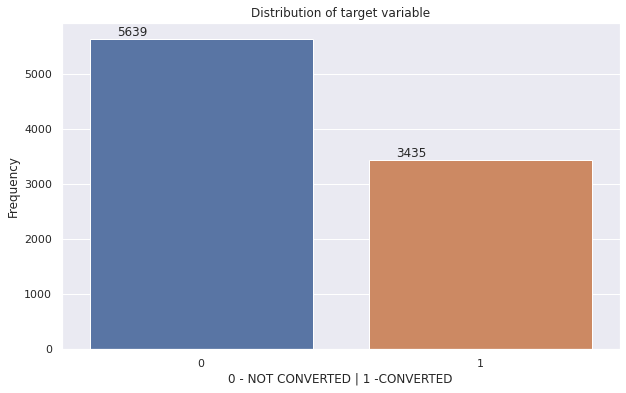

In [86]:
# Plot to visualize the target variable in the dataset:

sns.set(style="darkgrid")

plt.figure(figsize=(10,6))
ax = sns.countplot(x="Converted", data=data)
plt.title('Distribution of target variable')
plt.xlabel('0 - NOT CONVERTED | 1 -CONVERTED')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [87]:
# Percentage of True/False for Target Variable

print("Percentage of False for Converted")
print(((data["Converted"].value_counts()[0]/data.shape[0])*100).round(2))
print()
print("Percentage of True for Converted")
print(((data["Converted"].value_counts()[1]/data.shape[0])*100).round(2))

Percentage of False for Converted
62.14

Percentage of True for Converted
37.86


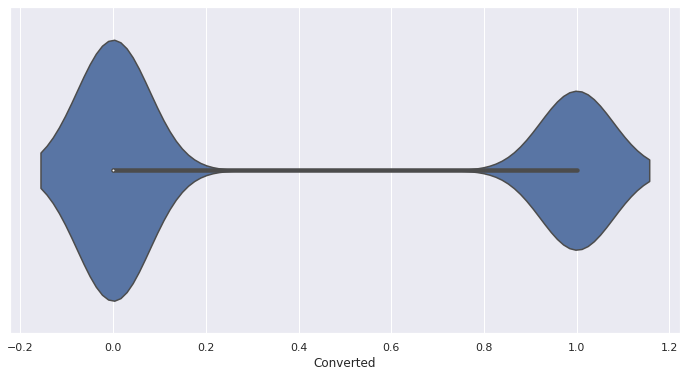

In [88]:
# Another plot of the TARGET variable "Converted"

sns.set(style="darkgrid")
plt.figure(figsize = (12, 6))
sns.violinplot(x = data["Converted"])
plt.show()

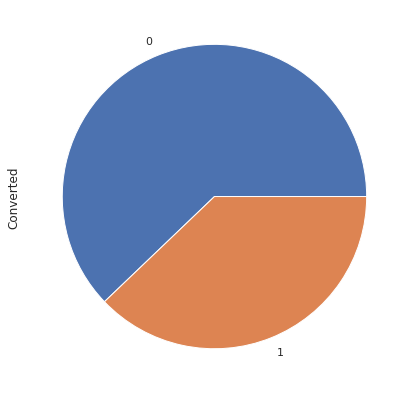

In [89]:
# Pie chart for the TARGET variable "Converted"

plt.figure(figsize = (7, 7))
data["Converted"].value_counts().plot.pie()
plt.show()

# 0 -> False 
# 1 -> True

In [90]:
# No data imbalance 
# Data points seem be fairly distributed 
# Not inclined towards one target category

In [91]:
## Outlier detection in our dataset

# Using boxplots to identify potential outliers in our dataset


In [92]:
data.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [93]:
# Count of numeric columns in our dataset
data.select_dtypes(include = ["float64", "int64"]).columns.size


5

In [94]:
# Creating numeric_col list to include all numeric columns from out dataset
numeric_columns = data.select_dtypes(include = ["float64", "int64"]).columns


In [95]:
numeric_columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [96]:
# Excluding target variable from numeric_column list
numeric_columns = numeric_columns.drop(["Converted"])

In [97]:
# Visualization for outlier detection in our data
sns.set( palette = "muted")

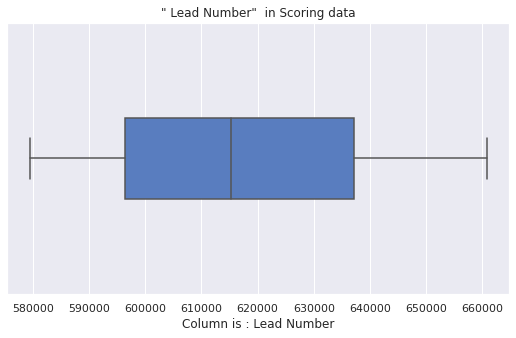

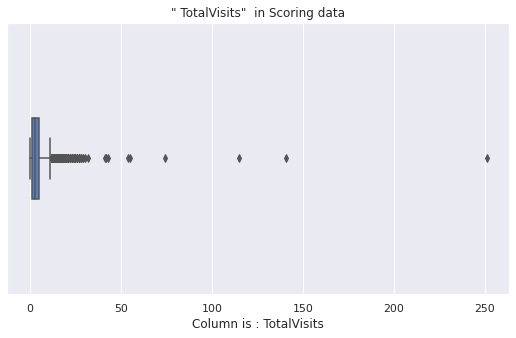

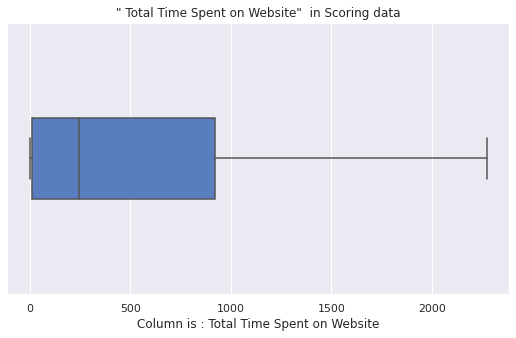

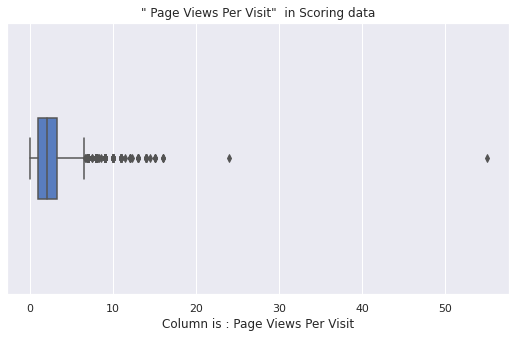

In [98]:
# Loop to visualize boxplots of numeric_columns in our dataset:

for col in numeric_columns[:]:
    plt.figure( figsize = (9, 5))
    sns.boxplot(x=data[col], width = 0.3)
    plt.title("\" "+ col + "\" " + " in Scoring data")
    plt.xlabel("Column is : " + col)
    plt.show()
    print()
    print()

In [99]:
# Thus , we have outliers in two columns as can be observed from above visualizations

# "Page Views Per Visit" and "TotalVisits" columns have perceptable outliers in the data
 

In [100]:
# Creating a new Column : "Converted_Categorical"
def f(row):
    if row["Converted"] == 1:
        val = "Yes"
    else:
        val = "No"
    return val

In [101]:
data["Converted_Categorical"] = data.apply(f, axis=1)


In [102]:
data["Converted"].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [103]:
data["Converted_Categorical"].value_counts()

No     5639
Yes    3435
Name: Converted_Categorical, dtype: int64

In [104]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Heard From Source', 'Current Occupation',
       'Important Career Factor', 'Search', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'City', 'Free Copy', 'Converted_Categorical'],
      dtype='object')

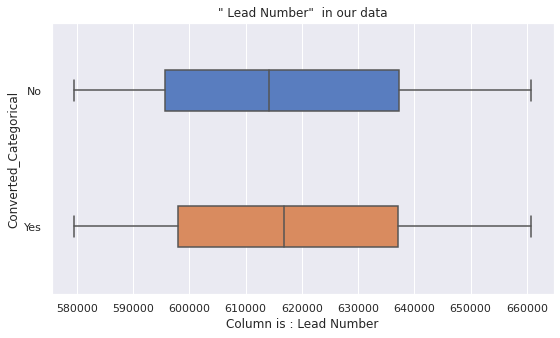

<Figure size 432x288 with 0 Axes>

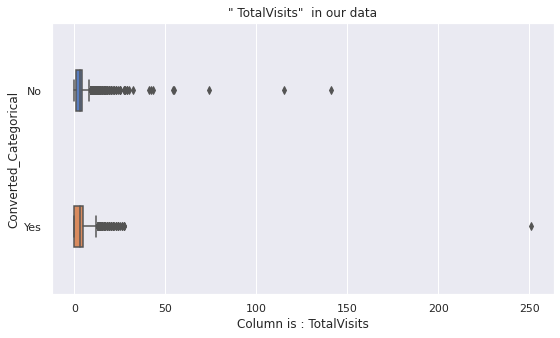

<Figure size 432x288 with 0 Axes>

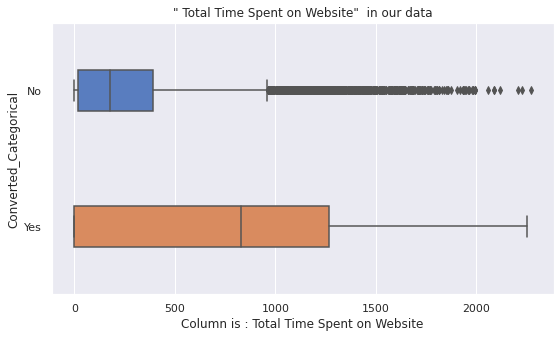

<Figure size 432x288 with 0 Axes>

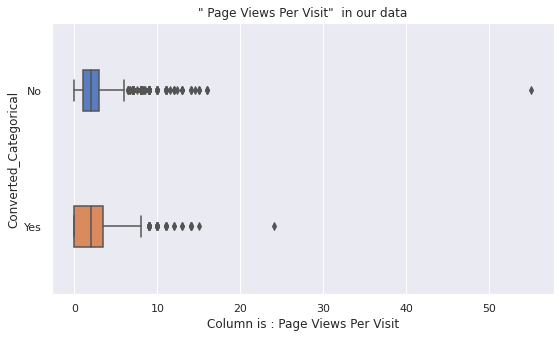

<Figure size 432x288 with 0 Axes>

In [105]:
# Segmented outlier detection for numeric_columns

for col in numeric_columns:
    plt.figure( figsize = (9, 5))
    sns.boxplot(x=col, y= "Converted_Categorical", data = data, width = 0.3)
    plt.title("\" "+ col + "\" " + " in our data")
    plt.xlabel("Column is : " + col)
    plt.show()
    print()
    print()
    plt.tight_layout()

In [106]:
# Again for segmemted outlier detection two columns have perceptable outliers

# "TotalVisits" and "Page Views Per Visit"


In [107]:
# Visualizations for our dataset

In [108]:
data.columns.size

26

In [109]:
data.dtypes

Prospect ID                     object
Lead Number                      int64
Lead Origin                     object
Lead Source                     object
Do Not Email                    object
Do Not Call                     object
Converted                        int64
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
Last Activity                   object
Country                         object
Specialization                  object
Heard From Source               object
Current Occupation              object
Important Career Factor         object
Search                          object
X Education Forums              object
Newspaper                       object
Digital Advertisement           object
Through Recommendations         object
Tags                            object
Lead Profile                    object
City                            object
Free Copy                       object
Converted_Categorical    

In [110]:
# Seperating continuous and categorical columns in our dataset

# We already have numeric_columns list
numeric_columns

Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [111]:
# Creating categorical column list
cat_columns = data.select_dtypes(include = ["object"]).columns

In [112]:
cat_columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'Heard From Source', 'Current Occupation', 'Important Career Factor',
       'Search', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'Free Copy',
       'Converted_Categorical'],
      dtype='object')

In [113]:
# Dropping "Converted_Categorical" from the cat_columns list

In [114]:
cat_columns = cat_columns.drop(["Converted_Categorical"])

In [115]:
cat_columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'Heard From Source', 'Current Occupation', 'Important Career Factor',
       'Search', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'Free Copy'],
      dtype='object')

In [116]:
# Dropping other columns which are not needed in cat_columns
cat_columns = cat_columns.drop(["Prospect ID"])

In [117]:
cat_columns.size

19

In [118]:
numeric_columns.size

4

In [119]:
# Thus, we have 4 columns in numeric_columns list and
# 19 columns in cat_columns list

In [120]:
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization', 'Heard From Source',
       'Current Occupation', 'Important Career Factor', 'Search',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'Free Copy'],
      dtype='object')

In [121]:
## Creating a copy of the dataset as variable "data" results in errors 
# paramenter name is also data for some plots

In [122]:
plot_data = data.copy()

In [123]:
# Plots for Categorical data :

In [124]:
# Plots for Continuous variables

In [125]:
# Function to plot for continuous variables in the data:

def continuous_variable_plot(column):
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without Converted status
    
    sns.distplot(plot_data.loc[plot_data[column].notnull(), column], kde=False, ax=ax1)
    ax1.set_title(column +" distribution")
    ax1.set_xlabel(column)
    ax1.set_ylabel('')

    # Plot with Converetd status
    
    sns.boxplot(x=column, y='Converted_Categorical', data=plot_data, ax=ax2, palette="ch:.25")
    ax2.set_ylabel('')
    ax2.set_title(column + ' by Converetd Status')
    
    ax2.set_xlabel(column)
    
    plt.tight_layout()
    print()
    print()

<Figure size 720x216 with 0 Axes>

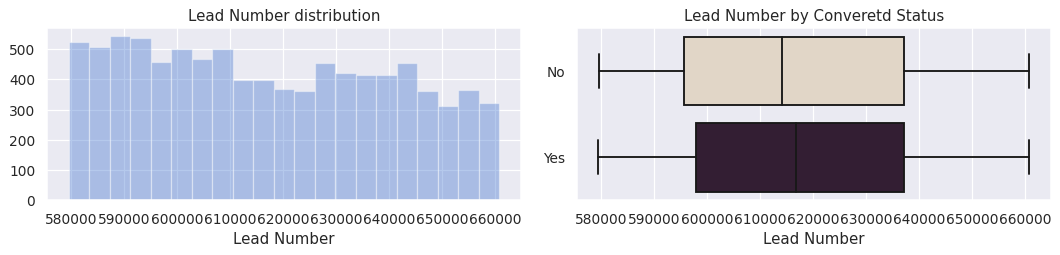

<Figure size 720x216 with 0 Axes>

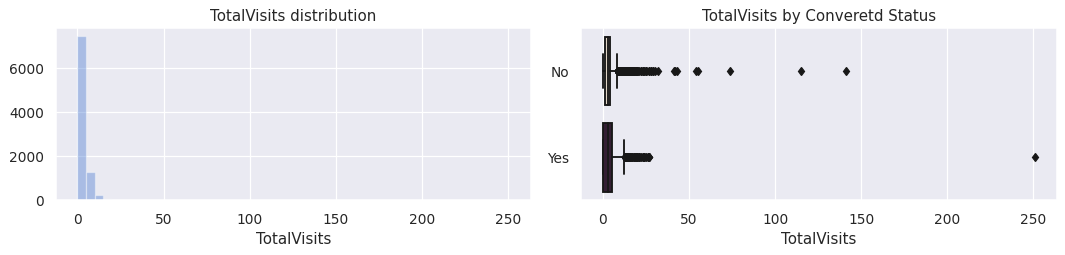

<Figure size 720x216 with 0 Axes>

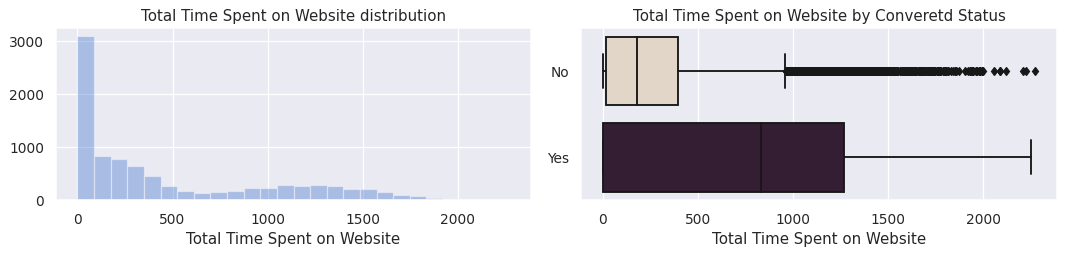

<Figure size 720x216 with 0 Axes>

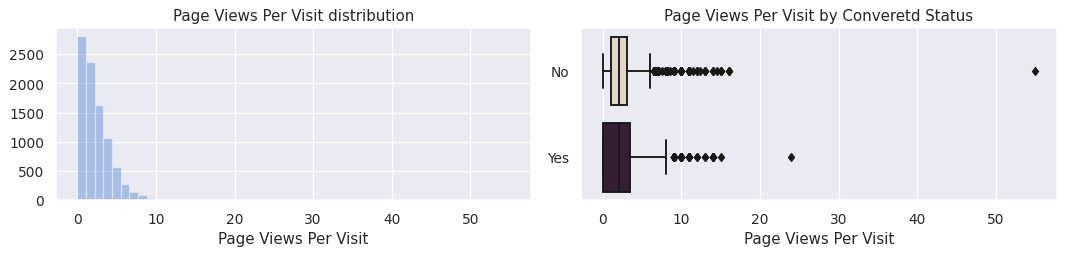

In [126]:
# Analyzing Continuous Variables in our dataset:

for column in numeric_columns:
  plt.figure(figsize = (10, 3))
  continuous_variable_plot(column)
  plt.show()
  print()
  print()

In [127]:
## Numeric and Categorical Columns combined visualizations:

In [128]:
# Function for numeric and categorical plotting for previous_app data

def data_numeric_categorical(cat_col, num_col):
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7), dpi=90)
    
    sns.stripplot(x = cat_col, y = num_col, data = plot_data, jitter = True, hue = "Converted_Categorical", dodge = True, ax = ax1) 
    ax1.set_title("Stripplot for " + cat_col + " and "+ num_col + " ")
    ax1.set_xlabel(cat_col)
    ax1.set_ylabel(num_col)
    
    sns.boxplot(x = cat_col, y = num_col, data = plot_data, hue = "Converted_Categorical", ax = ax2) 
    ax2.set_ylabel(num_col)
    ax2.set_title("Boxplot for " + cat_col + " and "+ num_col + " ")
    ax2.set_xlabel(cat_col)
    ax2.set_ylabel(num_col)
    plt.xticks(rotation = 90)

    plt.tight_layout()
    print()
    print()

In [129]:
sns.set(palette="Blues_d")


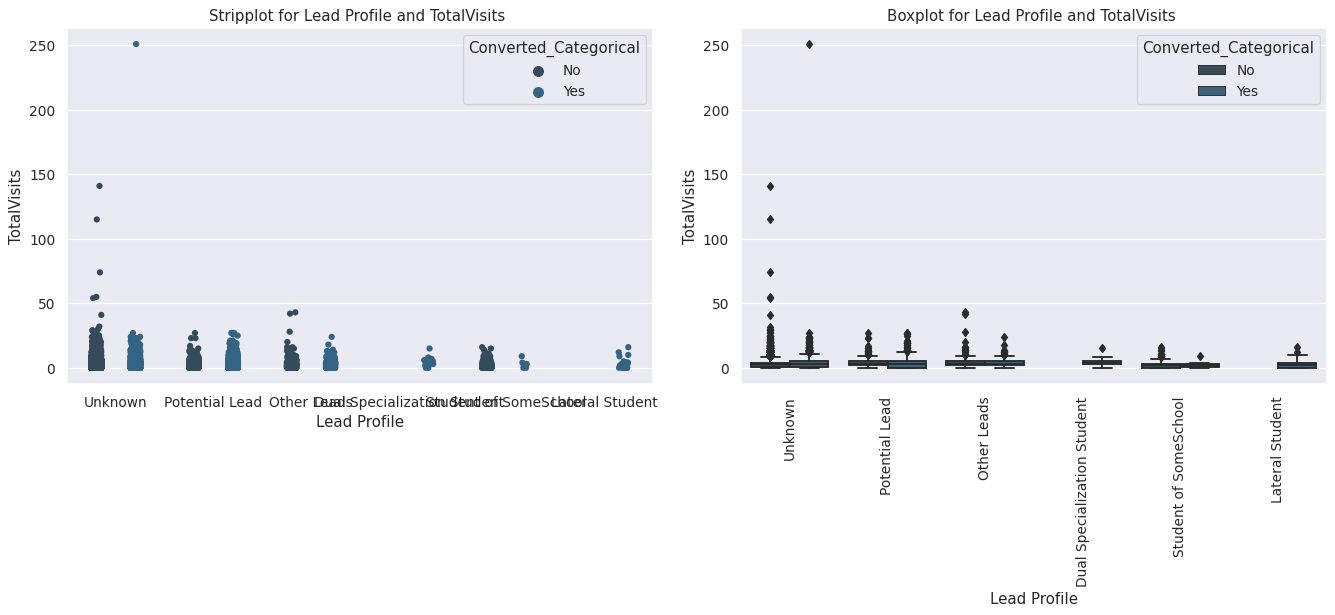

In [130]:
data_numeric_categorical( "Lead Profile", "TotalVisits")

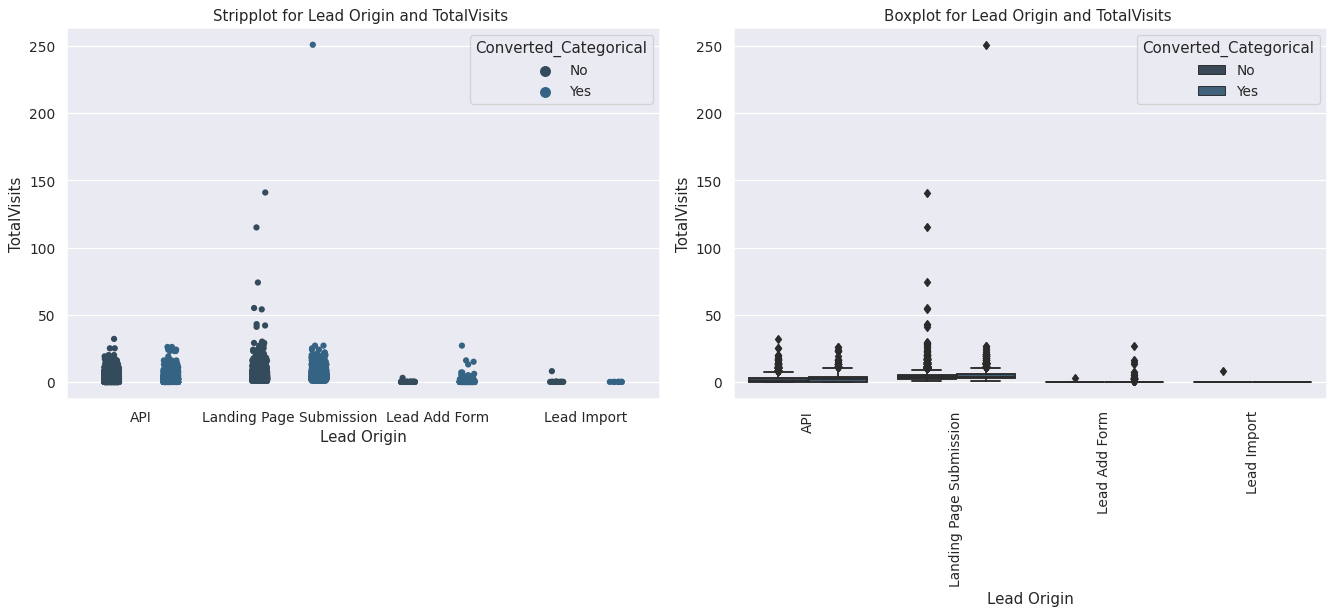

In [131]:
data_numeric_categorical( "Lead Origin", "TotalVisits")

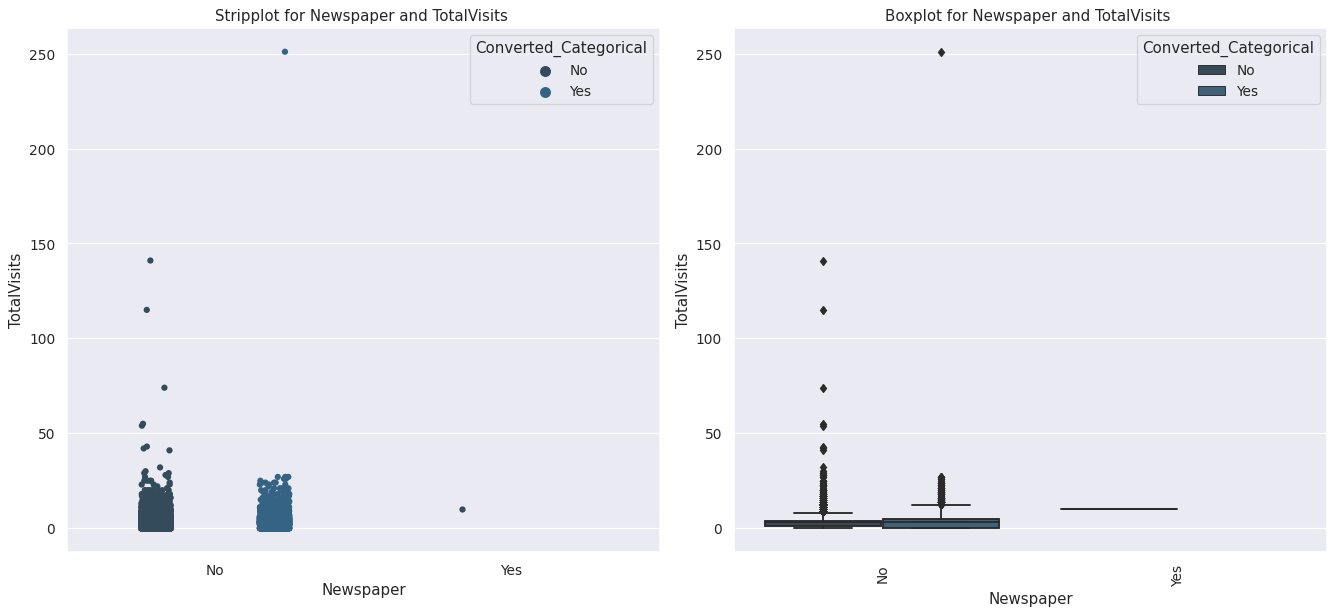

In [132]:
data_numeric_categorical( "Newspaper", "TotalVisits")

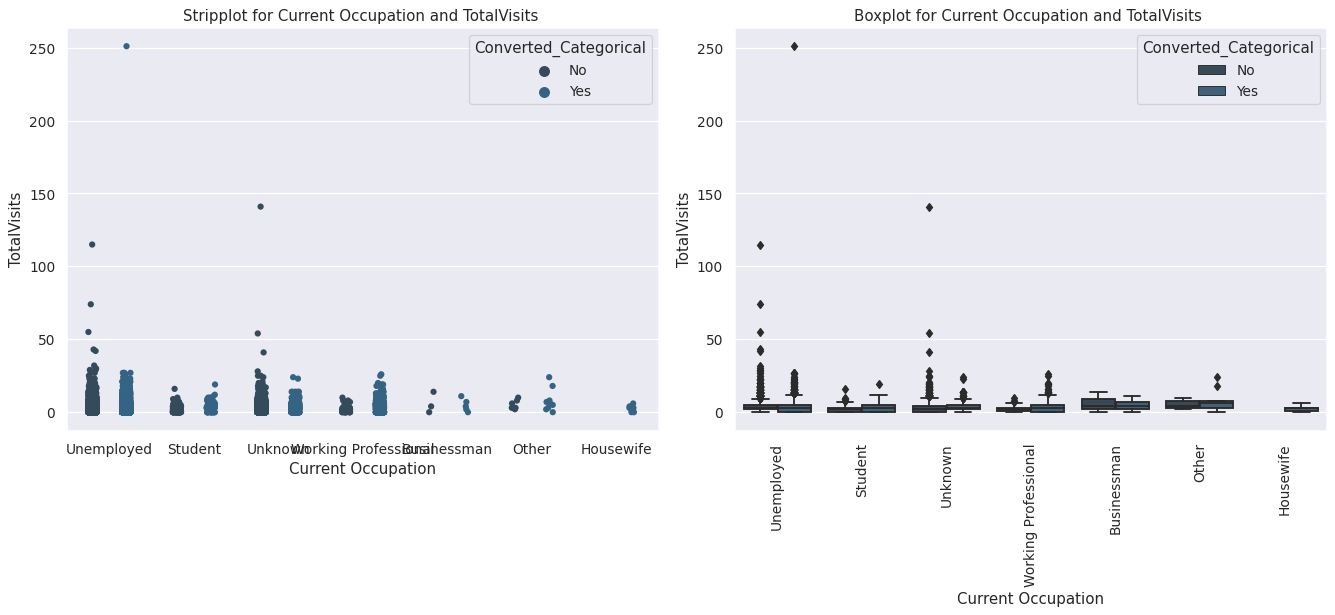

In [133]:
data_numeric_categorical( "Current Occupation", "TotalVisits")

In [134]:
sns.set(palette="Set2")


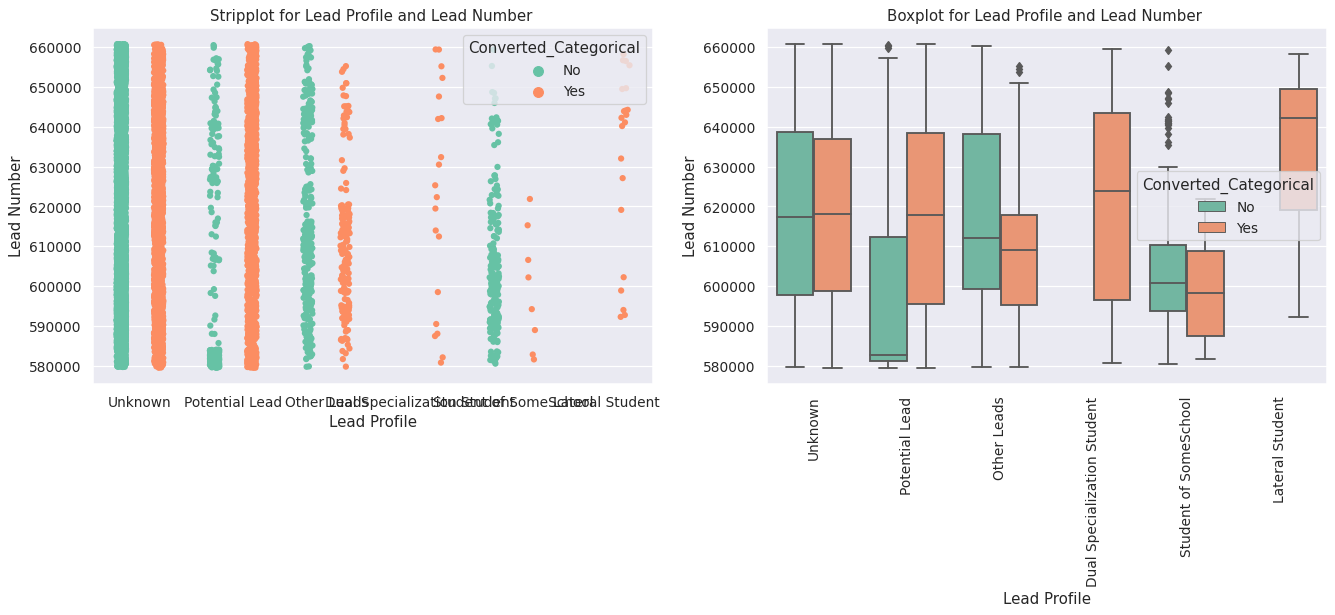

In [135]:
data_numeric_categorical( "Lead Profile", "Lead Number")

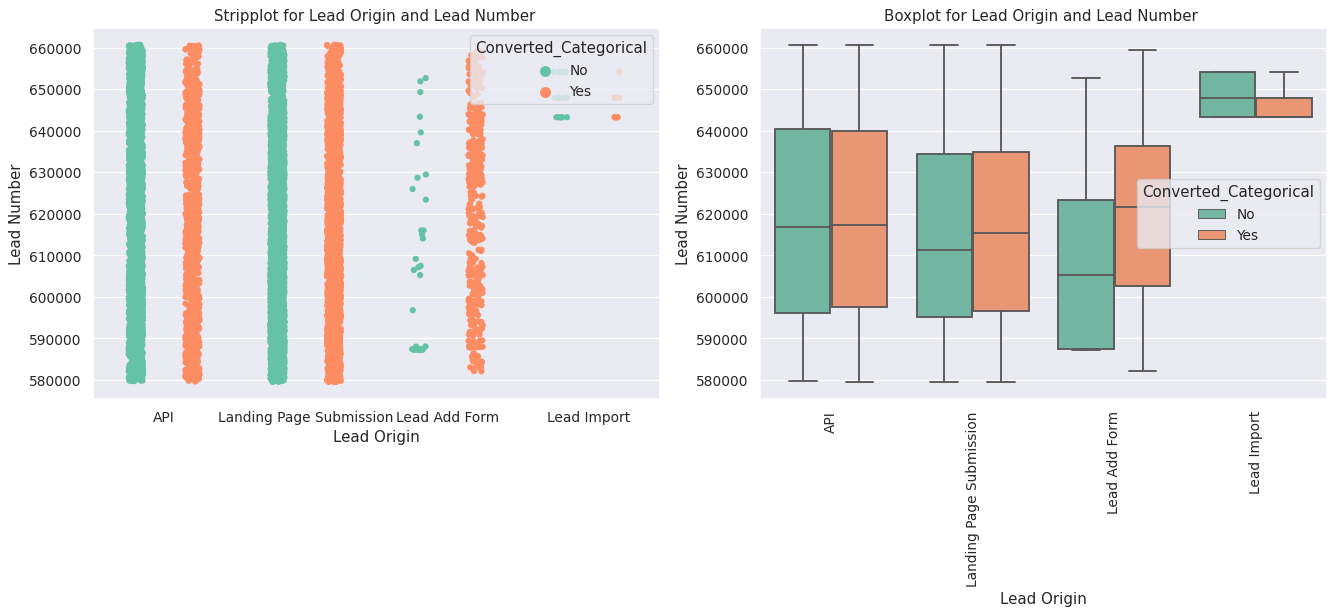

In [136]:
data_numeric_categorical( "Lead Origin", "Lead Number")

In [137]:
# Comparing Correlations in our dataset:


In [138]:
data.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.022830,0.022094,0.018360,0.058703
Converted,0.022830,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.022094,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.018360,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.058703,0.000260,0.511068,0.318350,1.000000


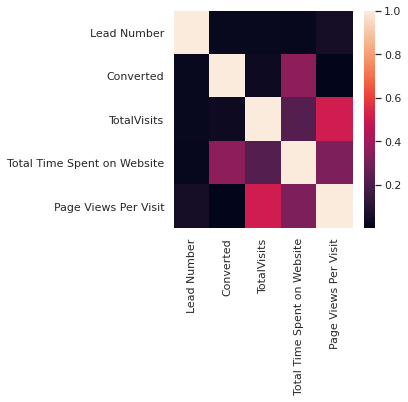

In [139]:
plt.figure(figsize = (4,4))
#sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200))
sns.heatmap(data.corr())

plt.show()

In [140]:
## Data in not highly linearly correlated...

In [141]:
### Model Building 

In [142]:
## Dropping the "Converted_Categorical" column
data = data.drop(columns = ["Converted_Categorical"])

In [143]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Heard From Source,Current Occupation,Important Career Factor,Search,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,Free Copy
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unknown Source,Unemployed,Better Career Prospects,No,No,No,No,No,Interested in other courses,Unknown,Unknown,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unknown Source,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,Unknown,Unknown,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Unknown Source,Student,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,Unknown,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Unknown,Mumbai,No


In [144]:
## Moving "Converted" column and making it the last colunm in the dataset

In [145]:
data.columns.size

25

In [146]:
cols_at_end = ["Converted"]
new_data = data[[c for c in data if c not in cols_at_end] 
        + [c for c in cols_at_end if c in data]]

In [147]:
new_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Heard From Source,Current Occupation,Important Career Factor,Search,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Profile,City,Free Copy,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,Unknown,Unknown,Unknown Source,Unemployed,Better Career Prospects,No,No,No,No,No,Interested in other courses,Unknown,Unknown,No,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,India,Unknown,Unknown Source,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,Unknown,Unknown,No,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,India,Business Administration,Unknown Source,Student,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Potential Lead,Mumbai,Yes,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,Ringing,Unknown,Mumbai,No,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,India,Unknown,Other,Unemployed,Better Career Prospects,No,No,No,No,No,Will revert after reading the email,Unknown,Mumbai,No,1


In [148]:
new_data.columns.size

25

In [149]:
## Dropping a few columns before model building

new_data = new_data.drop(columns = ["Lead Source", "Specialization", "Tags"])

In [150]:
## Loading X and y parameters for our model building

In [151]:
X = new_data.iloc[:, 1:-1].values
y = new_data.iloc[:, -1].values

In [152]:
print(X)

[[660737 'API' 'No' ... 'Unknown' 'Unknown' 'No']
 [660728 'API' 'No' ... 'Unknown' 'Unknown' 'No']
 [660727 'Landing Page Submission' 'No' ... 'Potential Lead' 'Mumbai'
  'Yes']
 ...
 [579545 'Landing Page Submission' 'Yes' ... 'Potential Lead' 'Mumbai'
  'Yes']
 [579538 'Landing Page Submission' 'No' ... 'Unknown'
  'Other Metro Cities' 'No']
 [579533 'Landing Page Submission' 'No' ... 'Potential Lead'
  'Other Cities' 'Yes']]


In [153]:
print(y)

[0 0 1 ... 0 1 1]


In [154]:
## X contains all values except Target variable
## y contains the target variable

In [155]:
## Encoding Categorical Data in our dataset

In [156]:
new_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Do Not Email',
       'Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Heard From Source',
       'Current Occupation', 'Important Career Factor', 'Search',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Lead Profile', 'City', 'Free Copy',
       'Converted'],
      dtype='object')

In [157]:
## Selecting columns for labelEncoding

## Applying LabelEncoding to our column features

#### 2, 3, 12, 13, 14, 15, 16, 19

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
le = LabelEncoder()
X[:, 3] = le.fit_transform(X[:, 3])
le = LabelEncoder()
X[:, 12] = le.fit_transform(X[:, 12])
le = LabelEncoder()
X[:, 13] = le.fit_transform(X[:, 13])
le = LabelEncoder()
X[:, 14] = le.fit_transform(X[:, 14])
le = LabelEncoder()
X[:, 15] = le.fit_transform(X[:, 15])
le = LabelEncoder()
X[:, 16] = le.fit_transform(X[:, 16])
le = LabelEncoder()
X[:, 19] = le.fit_transform(X[:, 19])



In [158]:
print(X[1:2, :])

[[660728 'API' 0 0 5.0 674 2.5 'Email Opened' 'India' 'Unknown Source'
  'Unemployed' 'Better Career Prospects' 0 0 0 0 0 'Unknown' 'Unknown' 0]]


In [159]:
new_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Do Not Email',
       'Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Heard From Source',
       'Current Occupation', 'Important Career Factor', 'Search',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Lead Profile', 'City', 'Free Copy',
       'Converted'],
      dtype='object')

In [160]:
## Selecting columns for OneHotEncoding

## Applying OneHotEncoding to our columns features

##### 1, 7, 8, 9, 10, 11, 17, 18

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer( transformers = [('encoder', OneHotEncoder(), [1, 7, 8, 9, 10, 11, 17, 18] )], remainder = "passthrough")
X = ct.fit_transform(X).toarray()

In [161]:
## Splitting data into training set and test set

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [163]:
print(X[1:2, :])

[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 6.60728e+05 0.00000e+00 0.00000e+00
  5.00000e+00 6.74000e+02 2.50000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00]

In [164]:
print(X[1:5, (69, 72, 73, 74)])

[[6.60728e+05 5.00000e+00 6.74000e+02 2.50000e+00]
 [6.60727e+05 2.00000e+00 1.53200e+03 2.00000e+00]
 [6.60719e+05 1.00000e+00 3.05000e+02 1.00000e+00]
 [6.60681e+05 2.00000e+00 1.42800e+03 1.00000e+00]]


In [165]:
### Applying Feature Scaling 

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train[:, (69, 72, 73, 74)] = sc.fit_transform(X_train[:, (69, 72, 73, 74)])
#X_train[:, (69, 72, 73, 74)] = sc.transform(X_train[:, (69, 72, 73, 74)])

## Feature Scaling omitted as it resulted in reduced accuracy in our model


In [166]:
### Training the model 

from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
### Predicting the test set result : Logistic Classifier

y_pred = log_classifier.predict(X_test)
print(  np.concatenate( (y_pred.reshape(len(y_pred), 1 ), y_test.reshape(len(y_test), 1) ),1  )   )

[[0 0]
 [0 0]
 [1 0]
 ...
 [1 1]
 [0 1]
 [0 0]]


In [168]:
#### Making the confusion matrix 

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : Logistic Regression")
print(cm)
print()
print("Accuracy Score : Logistic Regression")
print( accuracy_score(y_test, y_pred))


Confusion Matrix : Logistic Regression
[[1216  176]
 [ 454  423]]

Accuracy Score : Logistic Regression
0.7223446452181578


In [169]:
## Thus, our model results in an accuracy of 72% 

## Linear Classification results in 72% accuracy in our model

In [170]:
### Building Non Linear model

In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [172]:
### Predicting the test set result : KNN Classifier

y_pred_knn = knn_classifier.predict(X_test)
print(  np.concatenate( (y_pred_knn.reshape(len(y_pred), 1 ), y_test.reshape(len(y_test), 1) ),1  )   )

[[0 0]
 [0 0]
 [1 0]
 ...
 [1 1]
 [0 1]
 [0 0]]


In [173]:
#### Making the confusion matrix : KNN Classifier

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix : KNN Classifier ")
print(cm)
print()
print("Accuracy Score : KNN Classifier ")
print( accuracy_score(y_test, y_pred_knn))

Confusion Matrix : KNN Classifier 
[[1188  204]
 [ 402  475]]

Accuracy Score : KNN Classifier 
0.7329219920669898


In [174]:
## We, get an accuracy about the same value as the linear classifier.

## Accuracy for non-linear classifier is 73%

In [175]:
## Thus, both the linear and Non linear models resulted in almost same accuracy

# Logistic Regression : 72%
# KNN Classifier : 73%